https://colab.research.google.com/drive/1Eozd8cloabfzTZeaGPloD-MOApqVEo_W?usp=sharing

#**BA810 Group Project : Analysis on Amazon Customer Reviews**

Members: Ali Saadeddine, Pritam Pandit, Shubham Mishra, Sulaiman Alhomoud, Jishnu Moorthy

---






#**1.0 Exploratory Data Analysis**




In [ ]:
!pip install sweetviz
!pip install dataprep

In [ ]:
#Importing Libraries
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
import zipfile
import requests
from io import BytesIO
from wordcloud import WordCloud
import sweetviz as sv
from IPython.core.display import HTML

In [ ]:
# Importing file from GitHub
github_zip_url = 'https://github.com/JishnuMoorthy/BA810-jm/raw/main/Dataset(BA810).csv.zip'

response = requests.get(github_zip_url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

# Extract the contents of the zip file to a temporary directory
zip_file.extractall()
extracted_files = zip_file.namelist()
csv_file_name = 'Dataset(BA810).csv'
csv_file_path = f'{csv_file_name}'
df = pd.read_csv(csv_file_path)

<ipython-input-8-acfe11ba3434>:12: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()


Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



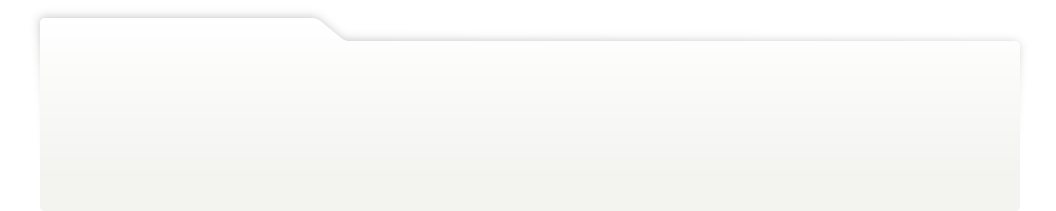
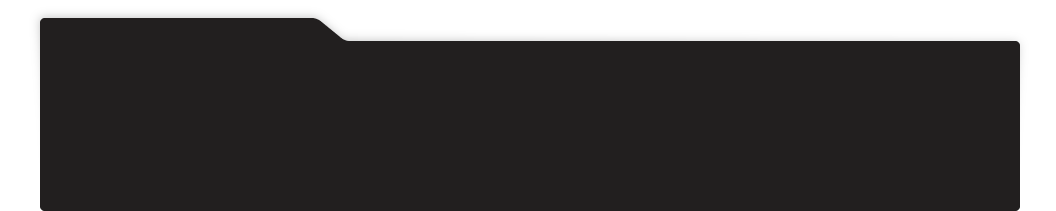
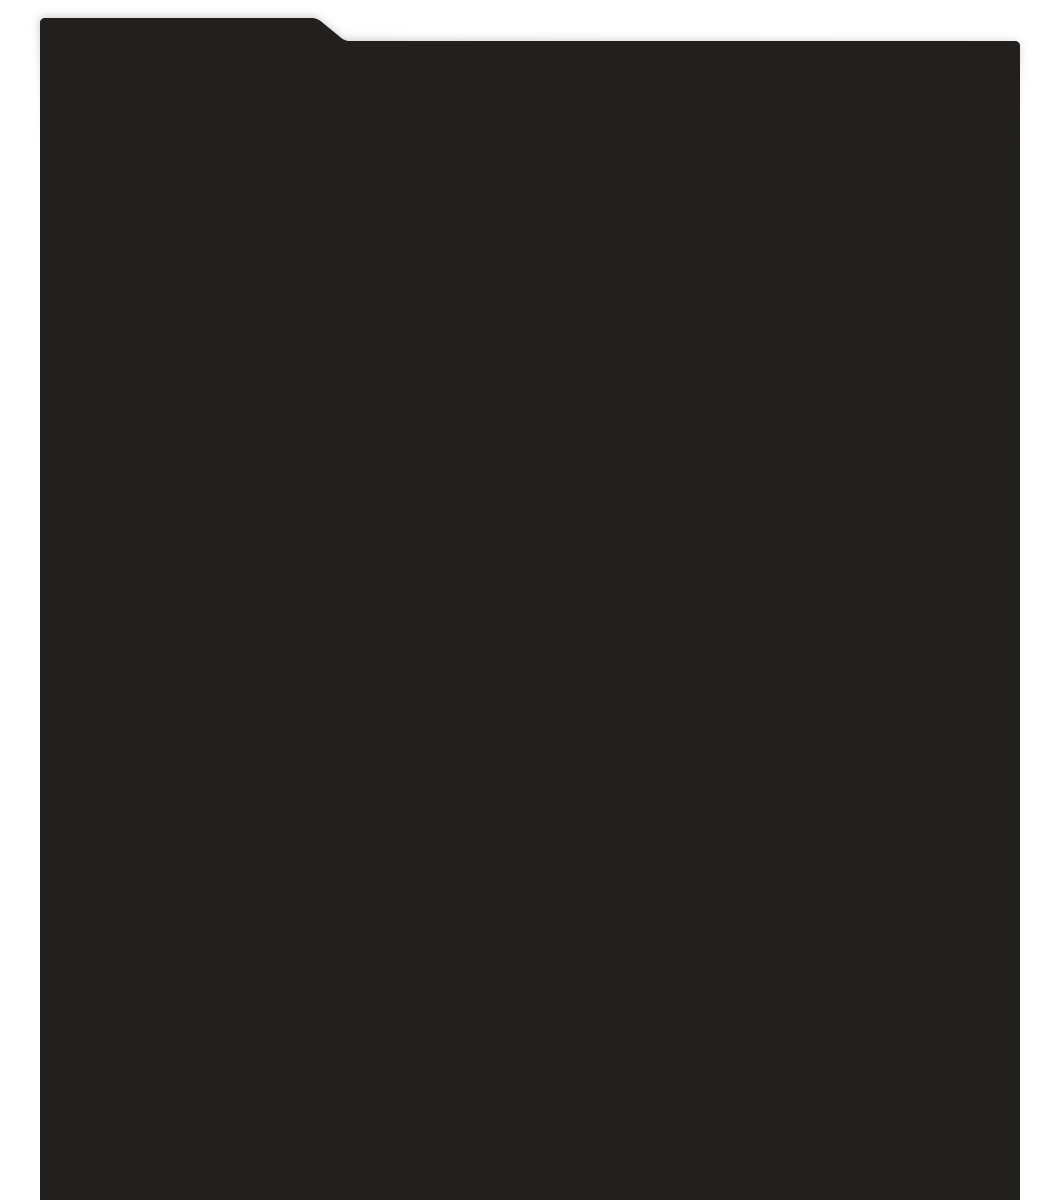
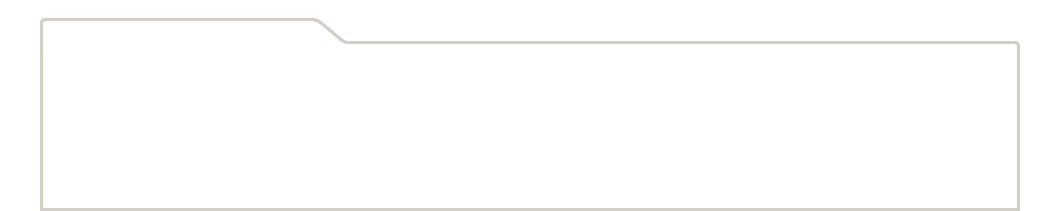
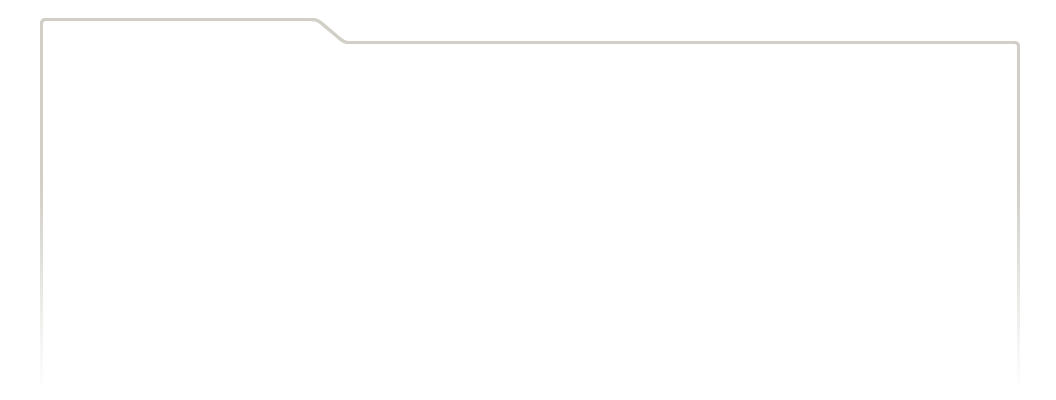
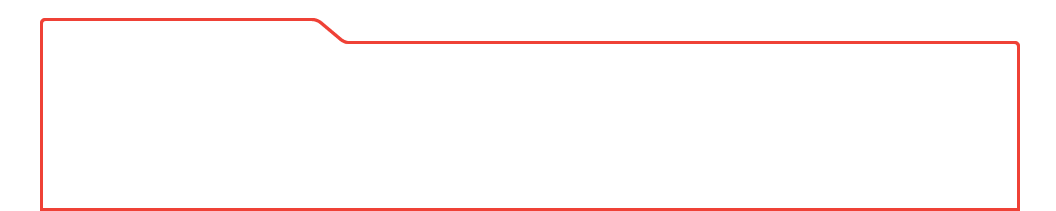
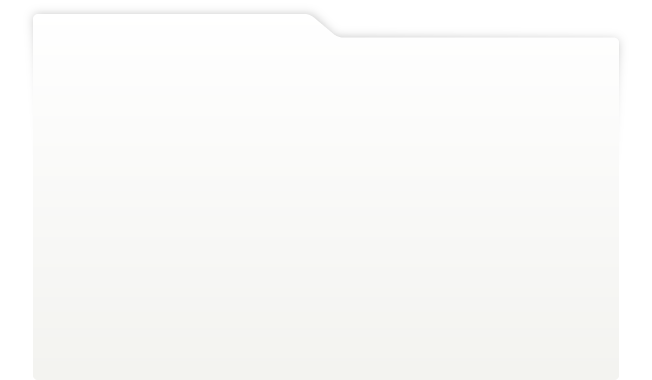
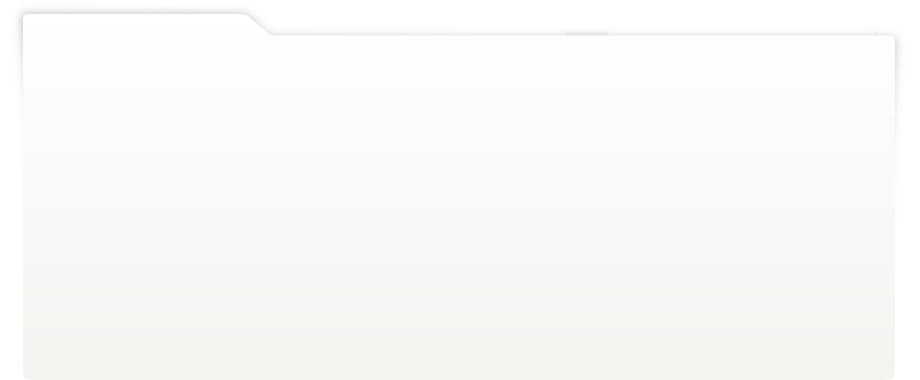
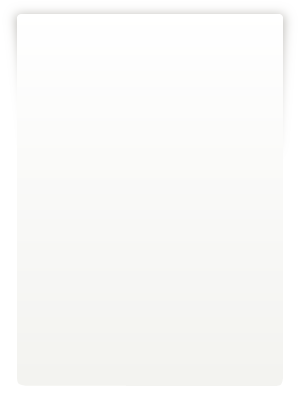
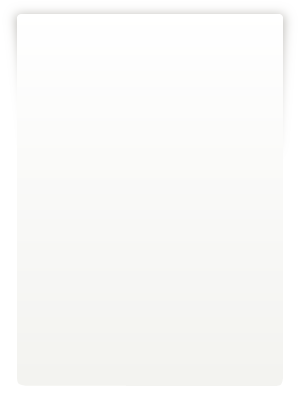
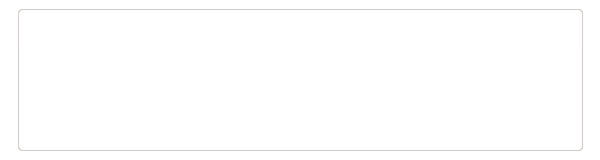
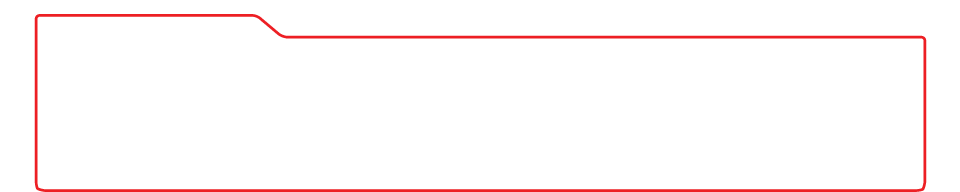
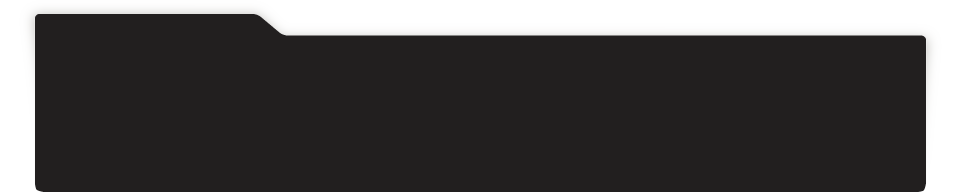
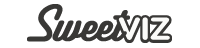
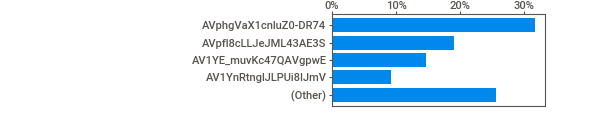
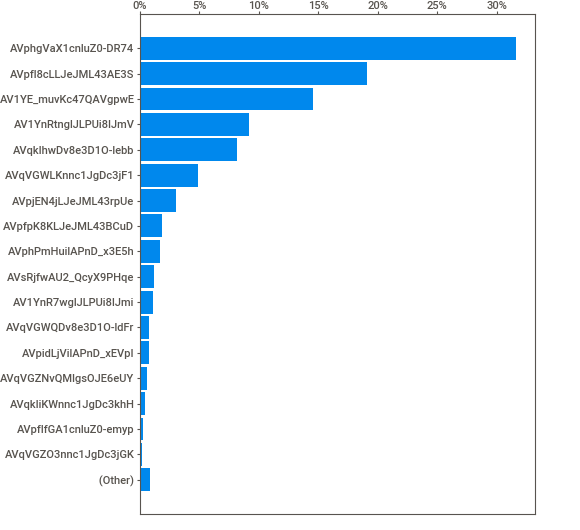
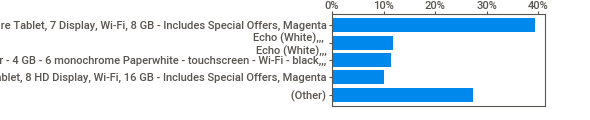
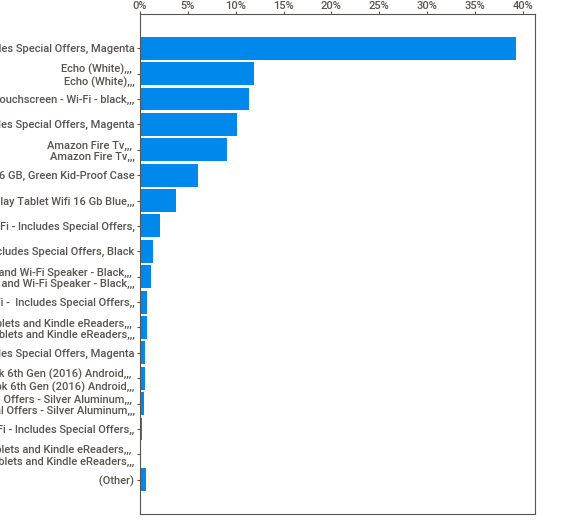
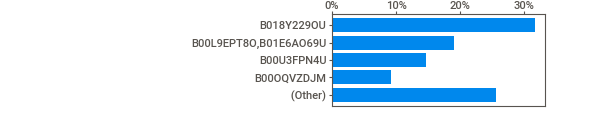
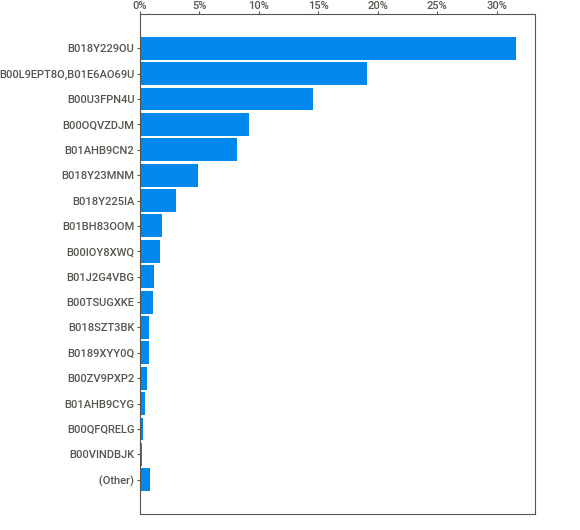
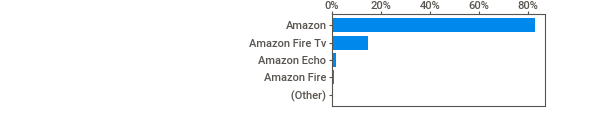
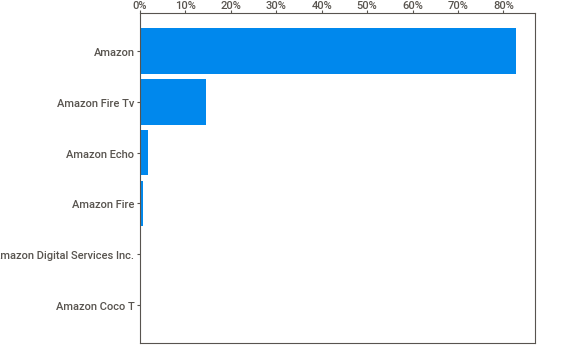
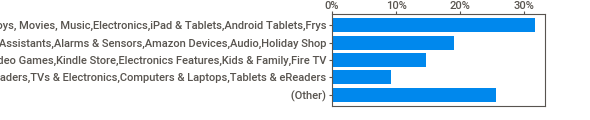
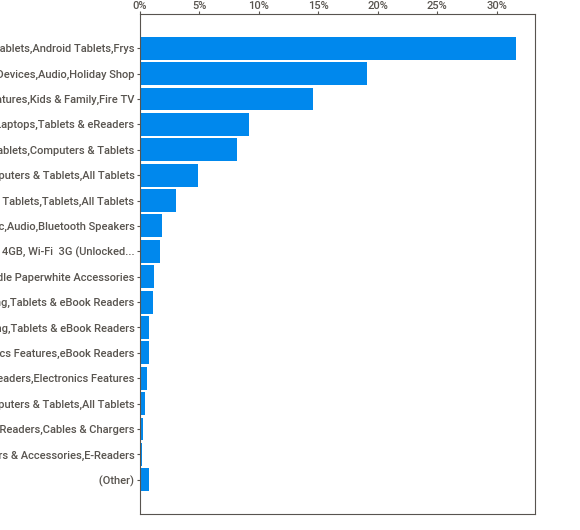
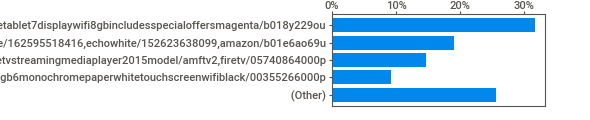
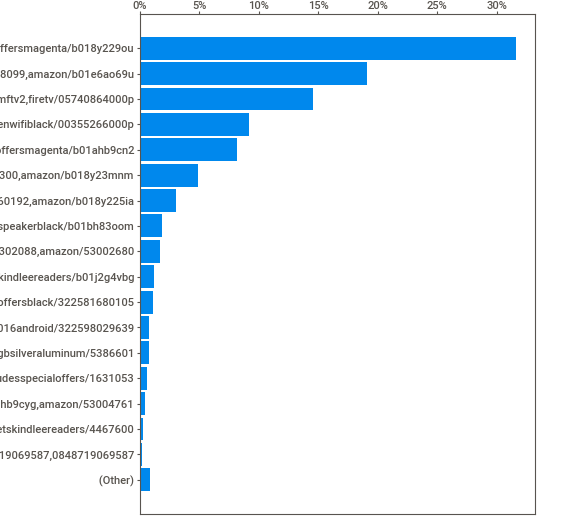
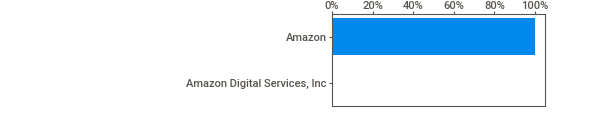
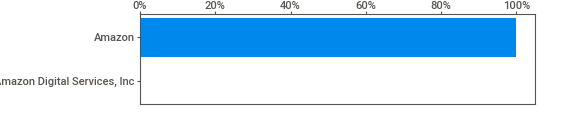
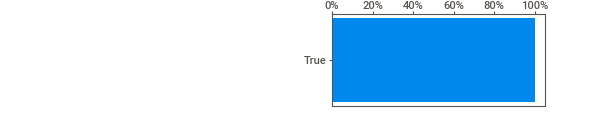
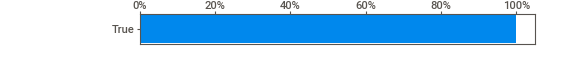
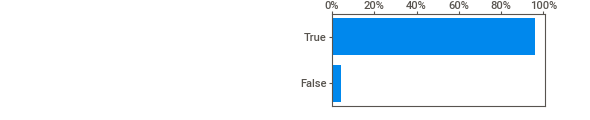
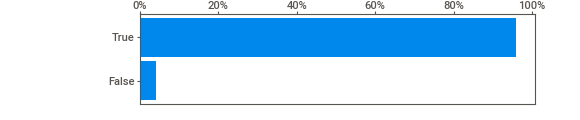
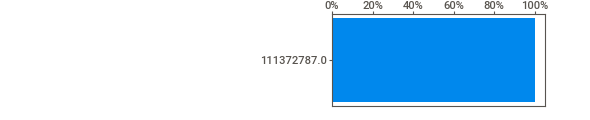
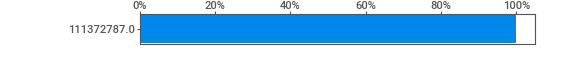
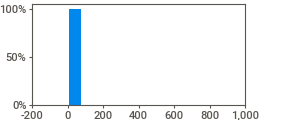
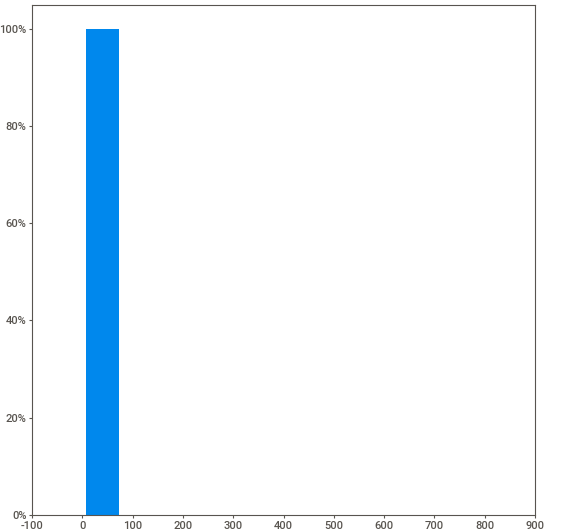
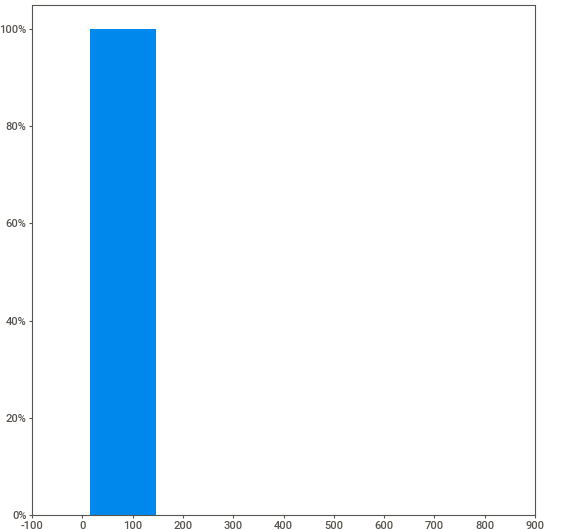
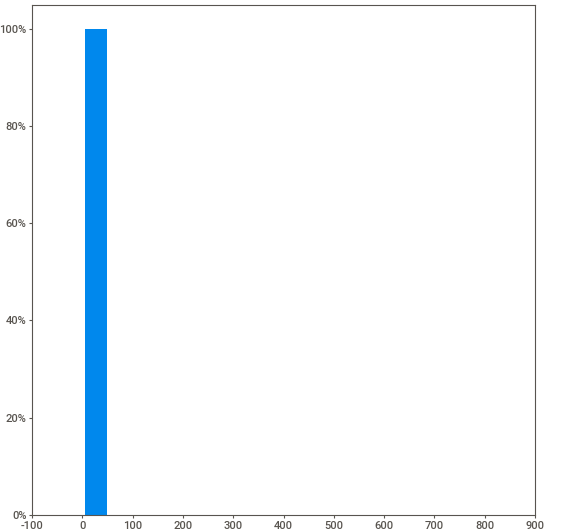
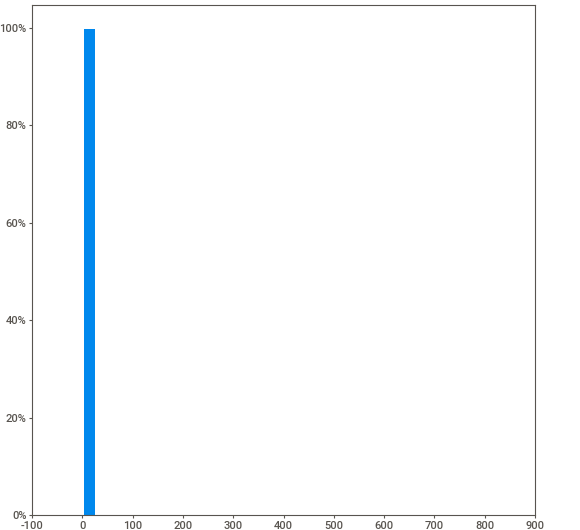
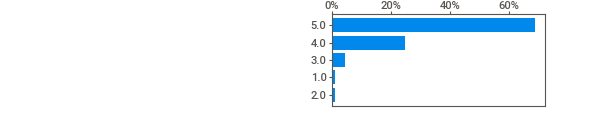
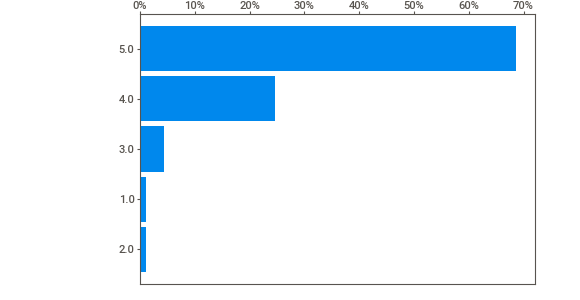
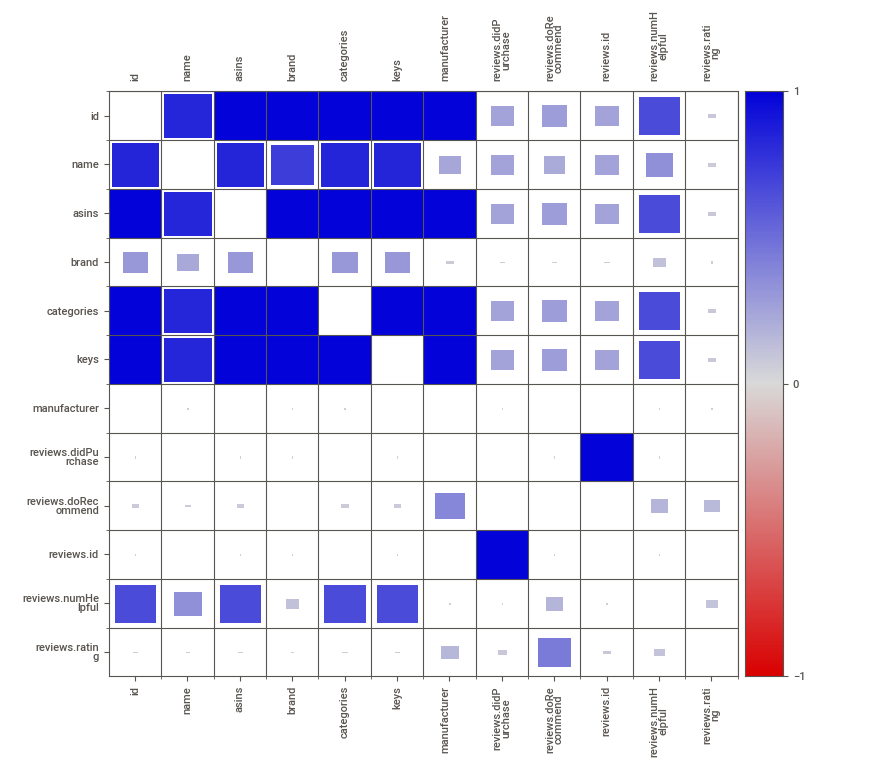
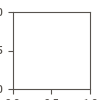

In [ ]:
# Using the Sweetviz library to perform data profiling

report = sv.analyze(df)
report_html = report.show_html('Report.html')
HTML(filename='Report.html')


In [ ]:
df.head(5)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
#Providing some Summary Statistics
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


### 1.1 Data Dictionary

* id (object): Unique identifier for each record. Essential for tracking individual records.
* name (object): Name of the product. Key for product categorization.
* asins (object): Amazon Standard Identification Numbers. Links to specific products on Amazon.
* brand (object): Brand of the product. Useful for brand analysis.
* categories (object): Product categories. Aids in market segmentation.
* keys (object): Key attributes of the product. May overlap with 'asins' or 'id'.
* manufacturer (object): Manufacturer of the product. Helps in manufacturer-based analysis.
* reviews.date (object): Date of the review. Crucial for time-series analysis.
* reviews.dateAdded (object): Date when the review was added. Reflects data collection period.
* reviews.dateSeen (object): Date when the review was recorded. Indicates data recording timeline.
* reviews.didPurchase (object): Indicates if the product was purchased. Sparse but valuable for purchase analysis.
* reviews.doRecommend (object): Reviewer's recommendation status. Useful for sentiment analysis.
* reviews.id (float64): Numeric ID of the review. Might be redundant.
* reviews.numHelpful (float64): Count of how many found the review helpful. Indicates review influence.
* reviews.rating (float64): Rating given by the reviewer. Central to sentiment analysis.
* reviews.sourceURLs (object): Source URLs of the reviews. Useful for source tracking.
* reviews.text (object): Full text of the review. Key for detailed text analysis.
* reviews.title (object): Title of the review. Provides quick sentiment insight.
* reviews.userCity (float64): User's city. Currently missing, but useful for geographical analysis.
* reviews.userProvince (float64): User's province. Similar to 'userCity', data is missing.
* reviews.username (object): Username of the reviewer. Useful for user-based analysis.

### 1.2 Data Cleaning





Overview of the data type & quality, and what is needed to be done :
* `name:` (object) 6600 missing values - Fill with 'Not Available'.
* `reviews.date:` (object) 239 missing values - Convert to datetime.
* `reviews.dateAdded:` (object) 4209 missing values - Convert to datetime, split into date and time.
* `reviews.didPurchase:` (object) 34659 missing values - Drop column, only 1 non-null value.
* `reviews.doRecommend:` (object) 30466 missing values - Impute with mode, convert to boolean.
* `reviews.id:` (float64) 34659 missing values - Drop column, only 1 non-null value.
* `reviews.numHelpful:` (float64) 3131 missing values - Impute with median.
* `reviews.rating:` (float64) 33 missing values - Impute with median.

Methods will be used for Data Cleaning:

* Dropping rows where any column has 10 or fewer missing values.
* Dropping columns with only 1 non-null value.
* Filling null values in 'name' with a placeholder 'Not Available'.
* Imputing numerical columns ('reviews.numHelpful', 'reviews.rating') with their medians.
* Converting date columns ('reviews.date', 'reviews.dateAdded', 'reviews.dateSeen') to datetime, normalizing times, and filling missing values using forward fill or a default time.
* Imputing boolean columns ('reviews.didPurchase', 'reviews.doRecommend') with the most common value or dropping if too sparse.

In [ ]:
# Replace NA or empty cells in the 'reviews.text' column with "Not Available"
df['reviews.text'] = df['reviews.text'].fillna("Not Available").replace("", "Not Available")

In [ ]:
#Checking for Null Values
df.isnull().any()

id                      False
name                     True
asins                    True
brand                   False
categories              False
keys                    False
manufacturer            False
reviews.date             True
reviews.dateAdded        True
reviews.dateSeen        False
reviews.didPurchase      True
reviews.doRecommend      True
reviews.id               True
reviews.numHelpful       True
reviews.rating           True
reviews.sourceURLs      False
reviews.text            False
reviews.title            True
reviews.userCity         True
reviews.userProvince     True
reviews.username         True
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
# Drop columns where all values are missing
df.dropna(axis=1, how='all', inplace=True)

# Drop rows where any column has missing values and the total missing values are 10 or fewer
for column in df.columns:
    if df[column].isna().sum() <= 10:
        df.dropna(subset=[column], inplace=True)

In [ ]:
# Drop columns with only 1 non-null value

df.drop(['reviews.didPurchase', 'reviews.id'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34652 entries, 0 to 34659
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   34652 non-null  object 
 1   name                 27894 non-null  object 
 2   asins                34652 non-null  object 
 3   brand                34652 non-null  object 
 4   categories           34652 non-null  object 
 5   keys                 34652 non-null  object 
 6   manufacturer         34652 non-null  object 
 7   reviews.date         34613 non-null  object 
 8   reviews.dateAdded    24036 non-null  object 
 9   reviews.dateSeen     34652 non-null  object 
 10  reviews.doRecommend  34061 non-null  object 
 11  reviews.numHelpful   34127 non-null  float64
 12  reviews.rating       34619 non-null  float64
 13  reviews.sourceURLs   34652 non-null  object 
 14  reviews.text         34652 non-null  object 
 15  reviews.title        34652 non-null 

In [ ]:
# Imputing numerical columns
df['reviews.numHelpful'].fillna(df['reviews.numHelpful'].median(), inplace=True)
df['reviews.rating'].fillna(df['reviews.rating'].median(), inplace=True)

In [ ]:
df.head(5)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [ ]:
# Converting to datetime
df['reviews.dateAdded'] = pd.to_datetime(df['reviews.dateAdded'])

# Split 'reviews.dateAdded' into date and time
df['reviews.timeAdded'] = df['reviews.dateAdded'].dt.time
df['reviews.dateAdded'] = df['reviews.dateAdded'].dt.date

In [ ]:
# Check if the entry is already a time object or a string, then convert accordingly
def convert_to_time(entry):
    if isinstance(entry, str):
        return pd.to_datetime(entry).time()  # Convert string to time
    elif isinstance(entry, pd.Timestamp):
        return entry.time()  # Extract time from Timestamp
    return entry  # If already a time object or NaN

df['reviews.timeAdded'] = df['reviews.timeAdded'].apply(convert_to_time)


In [ ]:
# Define the default time
default_time = pd.to_datetime('00:00:00').time()

# Fill in missing values in 'reviews.timeAdded' with the default time
df['reviews.timeAdded'] = df['reviews.timeAdded'].apply(lambda x: default_time if pd.isnull(x) else x)

In [ ]:
date_columns = ['reviews.date', 'reviews.dateAdded', 'reviews.dateSeen']

for col in date_columns:
    # Convert to datetime, coerce errors to NaT (Not a Time)
    df[col] = pd.to_datetime(df[col], errors='coerce')

    # Forward fill to impute missing values
    df[col].fillna(method='ffill', inplace=True)

    # Normalize datetime to midnight (removing the time component)
    df[col] = df[col].dt.normalize()

In [ ]:
# Fill null values in 'name' with 'Not Available'
df['name'].fillna('Not Available', inplace=True)

In [ ]:
# Impute missing values from 'reviews.dateSeen' forward fill
df['reviews.dateSeen'].fillna(method='ffill', inplace=True)

In [ ]:
# Impute 'reviews.doRecommend' with the mode
most_common_recommendation = df['reviews.doRecommend'].mode()[0]
df['reviews.doRecommend'].fillna(most_common_recommendation, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34652 entries, 0 to 34659
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   34652 non-null  object             
 1   name                 34652 non-null  object             
 2   asins                34652 non-null  object             
 3   brand                34652 non-null  object             
 4   categories           34652 non-null  object             
 5   keys                 34652 non-null  object             
 6   manufacturer         34652 non-null  object             
 7   reviews.date         34652 non-null  datetime64[ns, UTC]
 8   reviews.dateAdded    34652 non-null  datetime64[ns]     
 9   reviews.dateSeen     34043 non-null  datetime64[ns, UTC]
 10  reviews.doRecommend  34652 non-null  bool               
 11  reviews.numHelpful   34652 non-null  float64            
 12  reviews.rating    

#**2.0 Data Visualization**

<ipython-input-30-43c984ff3b52>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=df['brand'], y=df['brand'].index, palette='viridis')


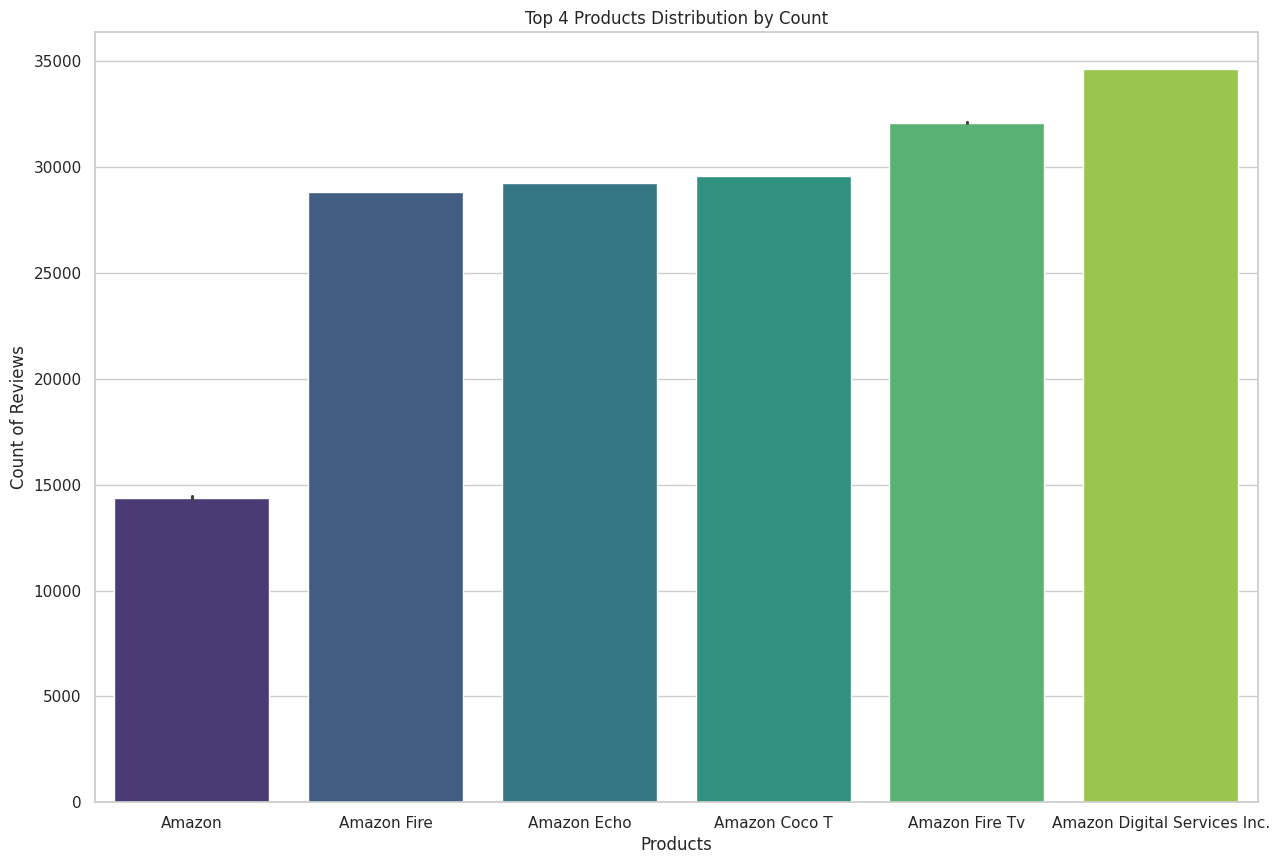

In [ ]:
# Plot to check products by popularity
plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')
plot = sns.barplot(x=df['brand'], y=df['brand'].index, palette='viridis')

plt.title(f'Top 4 Products Distribution by Count')
plt.xlabel('Products')
plt.ylabel('Count of Reviews')

plt.show()


This visualization illustrates the brands that gathered the most reviews within the dataset. Amazon Digital Services Inc emerges as the leader, accumulating nearly 3500 reviews across diverse products associated with this brand. This observation is in line with Amazon's business strategy, highlighting one of their major revenue-generating channels.

<ipython-input-31-076e718db899>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


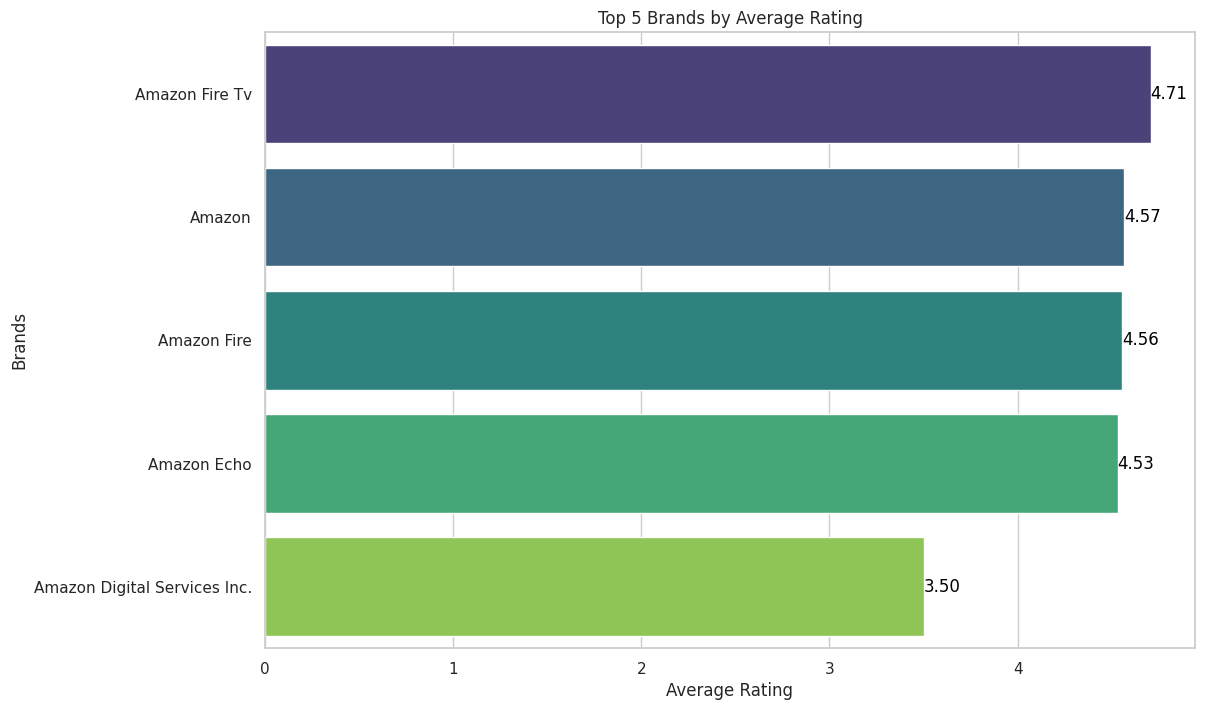

In [ ]:
# Exclude rows where 'brand' is 'Amazon Coco T'
df_filtered = df[df['brand'] != 'Amazon Coco T']

average_ratings = df_filtered.groupby('brand')['reviews.rating'].mean().sort_values(ascending=False)


top_brands = average_ratings.head(5)

# Horizontal bar plot using Seaborn with the 'viridis' color palette
plt.figure(figsize=(12, 8))

sns.set(style='whitegrid')
plot = sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')

plt.title(f'Top {5} Brands by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Brands')

# Annotate the bars with their average ratings
for index, value in enumerate(top_brands):
    plot.text(value, index, f'{value:.2f}', ha='left', va='center', color='black')

plt.show()


Presented here are the leading 5 brands based on the aggregated average ratings received from customer reviews. Amazon Fire TV secures the top position with a high rating of 4.7, suggesting it holds a favorable place in consumer preferences.

In contrast, Amazon Digital Services Inc received the lowest average rating, further adding to the earlier observations that this brand did not resonate as positively with customers.

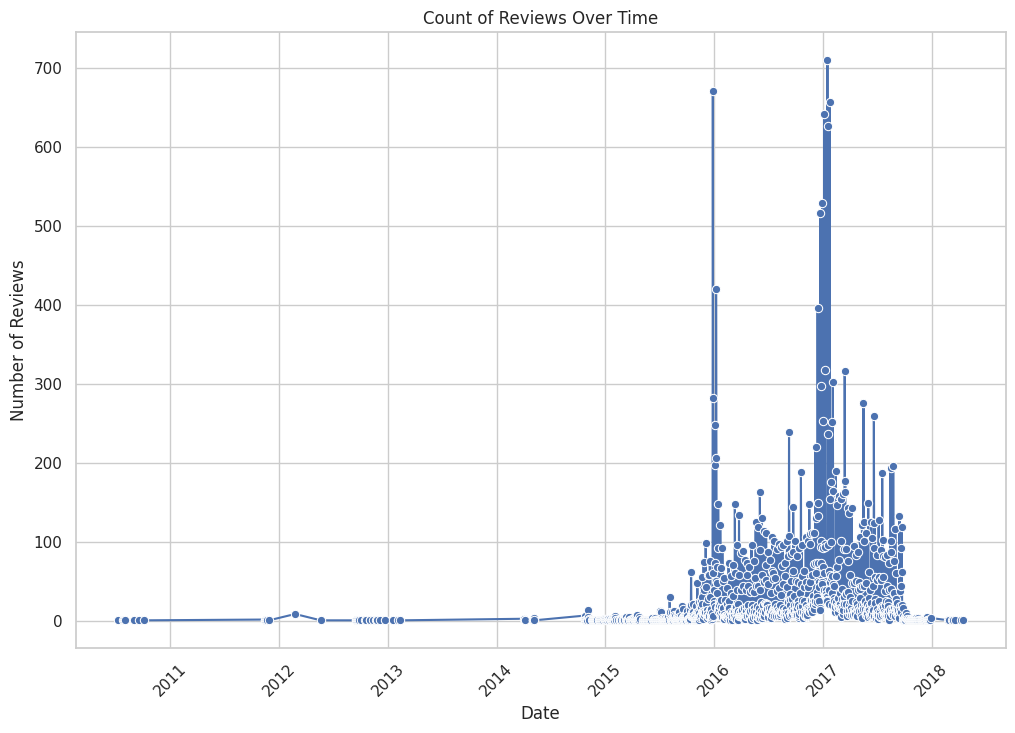

In [ ]:
df['reviews.date'] = pd.to_datetime(df['reviews.date'])

# Group by 'reviews.date' and calculate the count of reviews for each date
reviews_counts = df.groupby(df['reviews.date'].dt.date)['reviews.rating'].count()

# Plot the distribution of reviews over time using a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=reviews_counts, marker='o', color='b')

plt.title('Count of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

plt.show()

The line plot above illustrates the trend of review counts over the years, revealing a notable upward trend beginning in mid-2015 and a subsequent decline towards late 2017. Within this timeframe, there are bursts of activity, with particularly observable peaks at the start of the years 2016 and 2017.

<ipython-input-33-f6cab9c8f950>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day_of_week', data=df, order=df['day_of_week'].value_counts().index, palette='viridis')


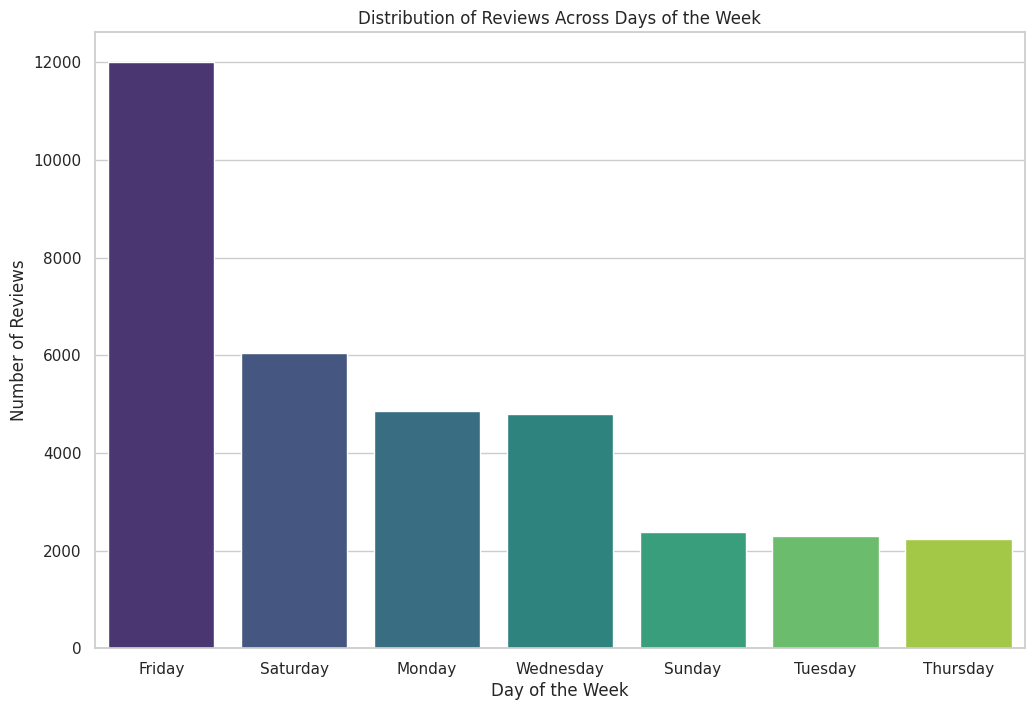

In [ ]:
df['reviews.date'] = pd.to_datetime(df['reviews.date'])
df['day_of_week'] = df['reviews.date'].dt.day_name()
plt.figure(figsize=(12, 8))
sns.countplot(x='day_of_week', data=df, order=df['day_of_week'].value_counts().index, palette='viridis')

plt.title('Distribution of Reviews Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Reviews')

plt.show()

The plot visualizes the distribution of customer reviews throughout the week. Notably, the weekend has with the highest review posting activity, peaking at around 12,000 on Friday and gradually decreasing to approximately 6,000 on Saturday.

Monday and Wednesday exhibit comparable levels of review traffic, indicating a consistent engagement pattern during these weekdays. This observation may suggest that customers tend to share their feedback more actively at the beginning of the week, potentially influenced by factors such as product launches, promotions, or post-weekend reflections.

<ipython-input-34-5b3f33c048ae>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')


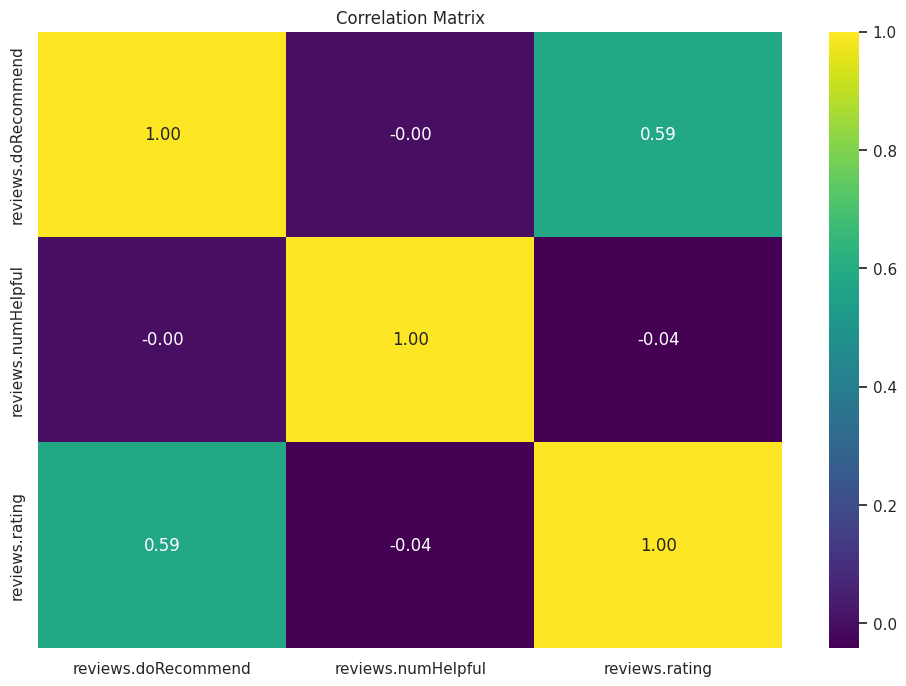

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

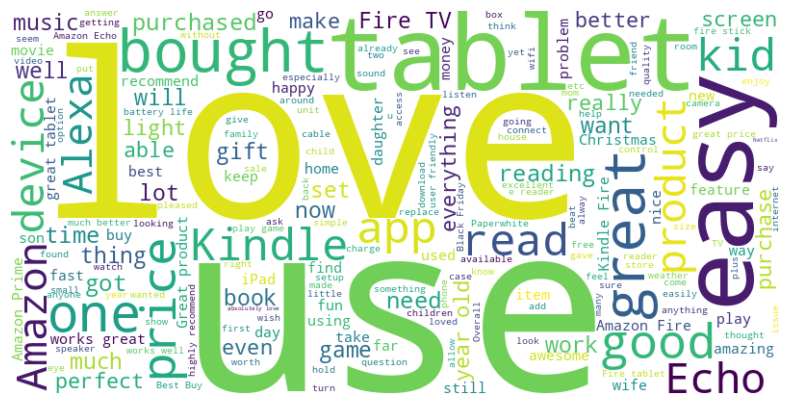

In [ ]:
#Wordcloud for the text in the reviews column
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

generate_wordcloud(" ".join(df['reviews.text']))


Based on the word cloud you sent, the most common words are "love", "use", "tablet", "Amazon", and "Fire". This suggests that the word cloud is related to people's positive experiences with using Amazon Fire tablets.

 Other words that stand out include "good", "great", "excellent", "amazing", and "awesome". These words further reinforce the positive sentiment of the word cloud.

 Some specific insughts that can be derived from this are:

- Amazon Fire tablets are popular for entertainment, reading, and shopping.
- People find Amazon Fire tablets to be good quality and value for money.
- Amazon Fire tablets are easy to use and set up.
- Amazon Fire tablets are popular with families and individuals of all ages.

#**3.0 Data Profiling**

We have used the SweetViz library to perform data profiling for our dataframe and included it in this notebook. This will help us to select the best features for our Machine learning Model.

In [ ]:
# Basic information about the dataset
print("Basic Information:")
print(df.info())

# Descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())

# Descriptive statistics for categorical features
print("\nDescriptive Statistics for Categorical Features:")
print(df.describe(include='object'))

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Checking for unique values in each column
print("\nUnique Values Count per Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")


Basic Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34652 entries, 0 to 34659
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   34652 non-null  object             
 1   name                 34652 non-null  object             
 2   asins                34652 non-null  object             
 3   brand                34652 non-null  object             
 4   categories           34652 non-null  object             
 5   keys                 34652 non-null  object             
 6   manufacturer         34652 non-null  object             
 7   reviews.date         34652 non-null  datetime64[ns, UTC]
 8   reviews.dateAdded    34652 non-null  datetime64[ns]     
 9   reviews.dateSeen     34043 non-null  datetime64[ns, UTC]
 10  reviews.doRecommend  34652 non-null  bool               
 11  reviews.numHelpful   34652 non-null  float64            
 12 

Based off on the above results, the dataset has about 34,562 entries after performing data cleaning which makes this a rich collection of Amazon product reviews. This provides us an interesting glimpse into customer opinions and experiences.

Every review text is unique which provides us a picture of individual customer stories. We have 49 product names, 41 unique ASINs, which shows us that this dataset covers a broad spectrum of products. Despite the diversity of variety of products, we have some products with the most frequent review title for example "Great Product" which explains the high positive sentiment of products.

Moreover, there are 26,783 unique usernames and out of these usernames, the most common reivewer name is "Mike".

Therefore, this dataset's size and varied column types from object to datetime and float allows us to perform sentiment analysis of the "reviews.text" and "reviews.title" columns to trend analysis over time.

#**4.0 Natural Language Processing**

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the Vader sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Let's say we have the following texts
texts = df['reviews.text']

# Create labels for these texts
labels = []
for text in texts:
    # Get the sentiment scores
    sentiment_scores = sia.polarity_scores(text)

    # Classify as positive or negative based on the compound score
    if sentiment_scores['compound'] > 0:
        labels.append('positive')
    else:
        labels.append('negative')

print(labels)  # Output: ['positive', 'negative']


['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'po

In [ ]:
Sentiment_df = pd.DataFrame({'Labels':labels,
                            'review':texts})

In [ ]:
Sentiment_df['Labels'].value_counts()

positive    31148
negative     3504
Name: Labels, dtype: int64

In [ ]:
Sentiment_df.describe()

,Labels,review
count,34652,34652
unique,2,34652
top,positive,This product so far has not disappointed. My c...
freq,31148,1


In [ ]:
Sentiment_df.groupby('Labels').describe()

review                                                               
          count unique                                                top freq
Labels                                                                        
negative   3504   3504  Not easy for elderly users cease of ads that p...    1
positive  31148  31148  This product so far has not disappointed. My c...    1

In [ ]:
Sentiment_df['label_num'] = Sentiment_df.Labels.map({'negative':0, 'positive':1})
Sentiment_df.head()

,Labels,review,label_num
0,positive,This product so far has not disappointed. My c...,1
1,positive,great for beginner or experienced person. Boug...,1
2,positive,Inexpensive tablet for him to use and learn on...,1
3,positive,I've had my Fire HD 8 two weeks now and I love...,1
4,positive,I bought this for my grand daughter when she c...,1


In [ ]:
Sentiment_df['message_len'] = Sentiment_df.review.apply(len)
Sentiment_df.head()

,Labels,review,label_num,message_len
0,positive,This product so far has not disappointed. My c...,1,143
1,positive,great for beginner or experienced person. Boug...,1,75
2,positive,Inexpensive tablet for him to use and learn on...,1,131
3,positive,I've had my Fire HD 8 two weeks now and I love...,1,593
4,positive,I bought this for my grand daughter when she c...,1,613


In [ ]:
Sentiment_df.groupby('Labels').median()

<ipython-input-45-7a6378ef1a31>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Sentiment_df.groupby('Labels').median()


,label_num,message_len
Labels,,
negative,0.0,102.0
positive,1.0,107.0


Text(0.5, 0, 'Message Length')

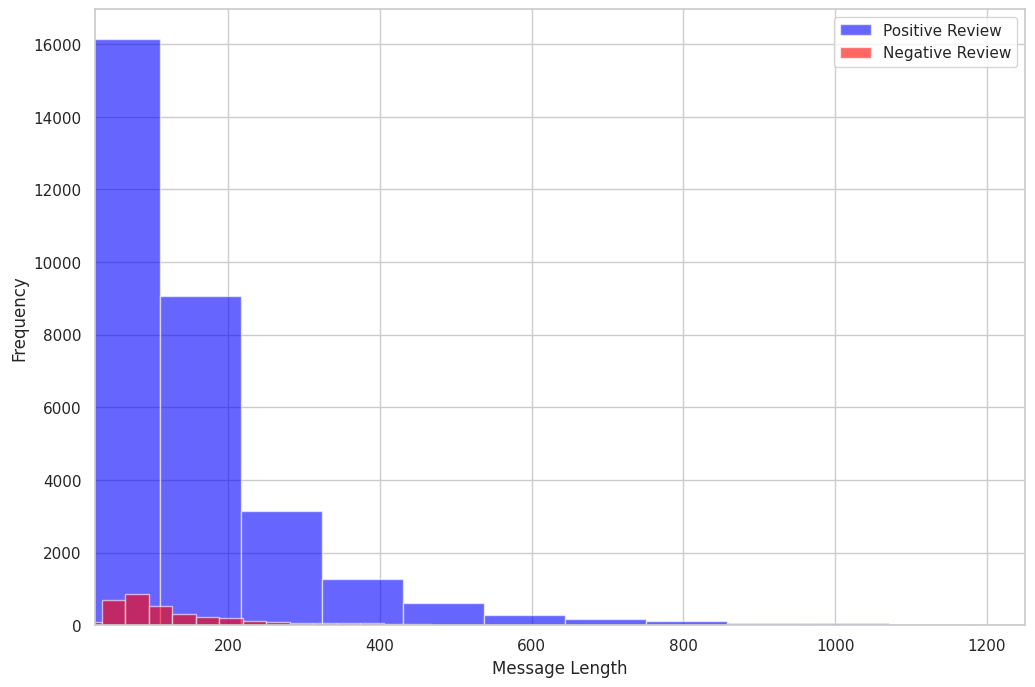

In [ ]:
plt.figure(figsize=(12, 8))

Sentiment_df[Sentiment_df.Labels=='positive'].message_len.plot(bins=100,kind='hist', color='blue',
                                       label='Positive Review', alpha=0.6)
Sentiment_df[Sentiment_df.Labels=='negative'].message_len.plot(bins=100,kind='hist', color='red',
                                       label='Negative Review', alpha=0.6)
plt.xlim((25,1250))
plt.legend()
plt.xlabel("Message Length")

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [ ]:
Sentiment_df['clean_review'] = Sentiment_df.review.apply(text_process)

Sentiment_df.head()

,Labels,review,label_num,message_len,clean_review
0,positive,This product so far has not disappointed. My c...,1,143,product far disappointed children love use lik...
1,positive,great for beginner or experienced person. Boug...,1,75,great beginner experienced person Bought gift ...
2,positive,Inexpensive tablet for him to use and learn on...,1,131,Inexpensive tablet use learn step NABI thrille...
3,positive,I've had my Fire HD 8 two weeks now and I love...,1,593,Ive Fire HD 8 two weeks love tablet great valu...
4,positive,I bought this for my grand daughter when she c...,1,613,bought grand daughter comes visit set user ent...


In [ ]:
type(stopwords.words('english'))

list

**Tokenization** is the process of breaking down text into smaller pieces called tokens. The tokens could be words, characters, or subwords.

In [ ]:
from collections import Counter

words = Sentiment_df[Sentiment_df.Labels=='negative'].clean_review.apply(lambda x: [word.lower() for word in x.split()])
negative_words = Counter()

for msg in words:
    negative_words.update(msg)

print(negative_words.most_common(50))

[('fire', 896), ('tablet', 745), ('kindle', 585), ('use', 554), ('one', 520), ('bought', 488), ('tv', 460), ('amazon', 438), ('get', 391), ('would', 303), ('price', 293), ('like', 258), ('apps', 252), ('works', 246), ('much', 244), ('purchased', 233), ('product', 229), ('time', 227), ('screen', 226), ('good', 224), ('got', 217), ('read', 216), ('great', 213), ('stick', 212), ('buy', 206), ('cant', 201), ('old', 200), ('device', 197), ('need', 189), ('books', 174), ('work', 173), ('reading', 171), ('kids', 169), ('using', 168), ('echo', 164), ('everything', 163), ('new', 163), ('really', 157), ('also', 157), ('problem', 151), ('lot', 146), ('cable', 146), ('little', 145), ('music', 144), ('alexa', 141), ('still', 139), ('box', 136), ('first', 133), ('doesnt', 133), ('even', 133)]


In [ ]:
from collections import Counter

words = Sentiment_df[Sentiment_df.Labels=='positive'].clean_review.apply(lambda x: [word.lower() for word in x.split()])
positive_words = Counter()

for msg in words:
    positive_words.update(msg)

print(positive_words.most_common(50))

[('great', 11520), ('tablet', 8214), ('use', 7049), ('love', 6500), ('easy', 6037), ('amazon', 5247), ('good', 4775), ('kindle', 4738), ('bought', 4559), ('one', 4437), ('fire', 3908), ('price', 3840), ('like', 3559), ('product', 3301), ('would', 2888), ('works', 2850), ('tv', 2767), ('echo', 2698), ('loves', 2603), ('get', 2601), ('music', 2583), ('kids', 2537), ('much', 2536), ('read', 2526), ('alexa', 2492), ('well', 2437), ('best', 2328), ('apps', 2321), ('reading', 2320), ('books', 2292), ('really', 2232), ('device', 2222), ('buy', 2101), ('games', 2097), ('also', 2023), ('play', 2021), ('time', 2007), ('old', 1996), ('gift', 1992), ('purchased', 1985), ('screen', 1976), ('recommend', 1917), ('better', 1903), ('got', 1848), ('set', 1623), ('perfect', 1592), ('nice', 1546), ('year', 1470), ('new', 1445), ('home', 1437)]


Split the data into train and test data

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = Sentiment_df.clean_review
y = Sentiment_df.label_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34652,)
(34652,)
(25989,)
(8663,)
(25989,)
(8663,)


**Vectorizing the Data**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)


# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (25989, 15765)
<class 'scipy.sparse._csr.csr_matrix'> (8663, 15765)


**Term Frequency-Inverse Document Frequency (TF-IDF):** TF-IDF is a more sophisticated model that weighs the word frequencies by their inverse document frequency. The term frequency (TF) is similar to what we have in BoW, but the inverse document frequency (IDF) diminishes the weight of words that occur very frequently in the document set and increases the weight of words that occur rarely.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<25989x15765 sparse matrix of type '<class 'numpy.float64'>'
	with 366844 stored elements in Compressed Sparse Row format>

**Building and evaluating a model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [ ]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred_class)

=======Accuracy Score===========
0.8949555581207433
=======Confision Matrix===========


array([[ 118,  839],
       [  71, 7635]])

In [ ]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

In [ ]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.8771044072376666

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred)

=======Accuracy Score===========
0.8896456193004733
=======Confision Matrix===========


array([[   1,  956],
       [   0, 7706]])

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

CPU times: user 687 ms, sys: 504 ms, total: 1.19 s
Wall time: 682 ms


LogisticRegression(solver='liblinear')

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.99877768, 0.42926217, 0.99115555, ..., 0.99999997, 0.99999739,
       0.99521532])

In [ ]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_prob))

=======Accuracy Score===========
0.9303936280734156
=======Confision Matrix===========
[[ 513  444]
 [ 159 7547]]
=======ROC AUC Score===========
0.927999487975145


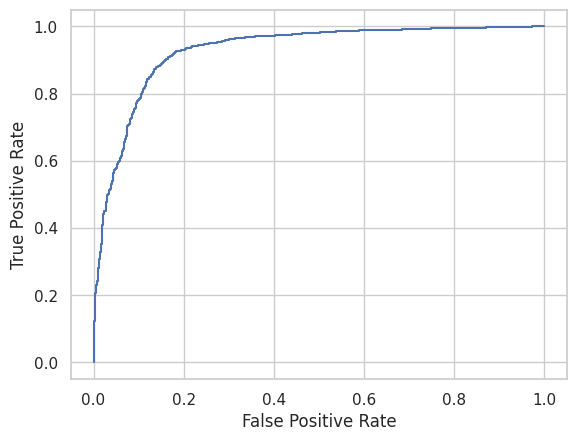

In [ ]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#**5.0 Conclusion**

After thorough sentiment analysis and logistic regression on Amazon reviews, we have achieved an accuracy score of around 93% and the ROC area under the curve score close to 93% from logistic regression model. These scores suggests us that our model is robust in distinguishing between positive and negative sentiments. By implementing confusion matrix, we have made sure that our model has effectively learned from the textual data to make accurate data predictions.

Furthermore, our findings about user locations including sentiment could allow us to perform further investigation as to is this because of cultural differences, varying expectations of differences in product availability.

Moreover, the histogram comparing the message lengths of positive and negative reviews gives us an interesting angle to the analysis. It suggests that users tend to write more when they have a strong opinion, which is often the case with negative experiences.

In conclusion, leveraging this information can lead to targeted improvements in products and services, and ultimately, customer satisfaction.



In [ ]:
!pip install cleanlab[datalab]

In [ ]:
from cleanlab import Datalab
from cleanlab.classification import CleanLearning
from cleanlab.benchmarking import noise_generation

In [ ]:
data = df.dr
labels = y

In [ ]:
from sklearn.model_selection import cross_val_predict
from numpy.random import multivariate_normal
from matplotlib import pyplot as plt

In [ ]:
data_dict = {"X": data, "y": labels}

# get out of sample predicted probabilities via cross-validation.
yourFavoriteModel = LogisticRegression(verbose=0, random_state=42)
pred_probs = cross_val_predict(
    estimator=yourFavoriteModel, X=data, y=labels, cv=3, method="predict_proba"
)

TypeError: Cannot cast DatetimeArray to dtype float64